In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

tc_df=pd.read_csv('Telco-Customer-Churn-Data.csv')

In [21]:
tc_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
cat_cols=[col for col in tc_df.columns if tc_df[col].dtype=='object']

In [45]:
con_cols=[col for col in tc_df.columns if tc_df[col].dtype=='int64' or tc_df[col].dtype=='float64']

In [23]:
y=tc_df['Churn']
tc_df.drop(columns='Churn',inplace=True)

In [24]:
mainfo_df=pd.DataFrame({'col_name':tc_df.columns,'na_cnt':tc_df.isnull().sum(),'pc_cnt':(tc_df.isnull().sum()/tc_df.shape[0])*100})


In [43]:
x_train,x_test,y_train,y_test=train_test_split(tc_df,y,random_state=52,test_size=0.2)


In [48]:
for col in con_cols:
    x_train[col].fillna(x_train[col].mean(),inplace=True)
    x_test[col].fillna(x_train[col].mean(),inplace=True)

In [51]:
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode(),inplace=True)
    x_test[col].fillna(x_train[col].mode(),inplace=True)

In [56]:
scaler=StandardScaler()

for col in con_cols:
    x_train[col]=scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=scaler.transform(np.array(x_test[col]).reshape(-1,1))

In [60]:
cat_encd_train=pd.get_dummies(x_train[cat_cols])
cat_encd_test=pd.get_dummies(x_test[cat_cols])

In [74]:
x_test_final.shape,x_train_final.shape

((1409, 2831), (5634, 10971))

In [78]:
cat_encd_train_final,cat_encd_test_final=cat_encd_train.align(cat_encd_test,join='inner',axis=1)

In [84]:
x_train_final=pd.concat([x_train[con_cols],cat_encd_train_final],axis=1)

In [85]:
x_test_final=pd.concat([x_test[con_cols],cat_encd_test_final],axis=1)

In [86]:
logreg=LogisticRegression()
logreg.fit(x_train_final,y_train)

LogisticRegression()

In [107]:
y_test_pred=logreg.predict(x_test_final)


In [90]:
confusion_matrix(y_test,y_test_pred)

array([[916, 111],
       [150, 232]], dtype=int64)

In [93]:
precision_score(y_test,y_test_pred,pos_label='Yes')

0.6763848396501457

In [95]:
recall_score(y_test,y_test_pred,pos_label='Yes')

0.6073298429319371

In [96]:
f1_score(y_test,y_test_pred,pos_label='Yes')

0.6399999999999999

Text(0.5, 1.0, 'AUC Curve')

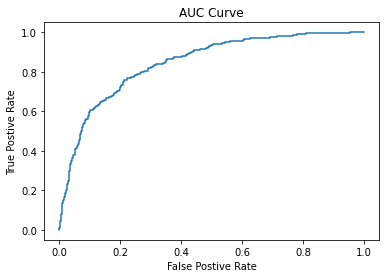

In [105]:
pos_probs=logreg.predict_proba(x_test_final)[::,1]
fpr,tpr,thresold=roc_curve(y_test,pos_probs,pos_label='Yes')
plt.plot(fpr,tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC Curve')

In [103]:
roc_auc_score(y_test,pos_probs)

0.8451240587896429

In [110]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train_final,y_train)

DecisionTreeClassifier()

In [115]:
y_dtree_test_pred=dtree.predict(x_test_final)
y_dtree_test_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [116]:
confusion_matrix(y_test,y_dtree_test_pred)

array([[849, 178],
       [194, 188]], dtype=int64)

In [120]:
precision_score(y_test,y_dtree_test_pred,pos_label='Yes')

0.5136612021857924

In [121]:
recall_score(y_test,y_dtree_test_pred,pos_label='Yes')

0.49214659685863876

In [122]:
f1_score(y_test,y_dtree_test_pred,pos_label='Yes')

0.5026737967914439

Text(0.5, 1.0, 'AUC Curve')

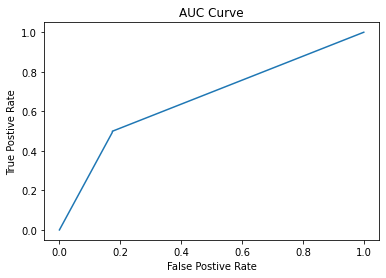

In [123]:
dtree_pos_probs=dtree.predict_proba(x_test_final)[::,1]
dtree_fpr,dtree_tpr,dtree_thresold=roc_curve(y_test,dtree_pos_probs,pos_label='Yes')
plt.plot(dtree_fpr,dtree_tpr)
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('AUC Curve')

In [124]:
roc_auc_score(y_test,dtree_pos_probs)

0.6621685690543799